In [1]:
#Q2

In [1]:
import pandas as pd
import numpy as np
from numpy import math
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')

In [3]:
x1=df['GrLivArea']
x2=df['TotalBsmtSF']
y=df['SalePrice']

In [4]:
x1=(x1-x1.mean()/x1.std())
x2=(x2-x2.mean()/x2.std())
#For e.g x1=[1,2,3], x2=[4,5,6] 
#to convert them into
#([1 4]
#[2 5]
#[3 6])
#we use np.c_
x=np.c_[x1,x2,np.ones(x1.shape[0])]
x.shape

(1460, 3)

In [9]:
import time

#GD algorithm
learning_rate=0.01
epochs=20
N=y.size
np.random.seed(123)
coeff=np.random.rand(3) #generates 3 random nos as there are 3 coefficients
print("Initial values of coefficients: ",coeff)


#algorithm
def gD(x,y,coeff,epochs,learning_rate):
  past_costs=[]
  past_coeff=[coeff]
  for i in range(epochs):
    prediction=np.dot(x,coeff) #multiplies elements of x array with that of coeff array
    error=prediction-y
    cost=1/(2*N)*np.dot(error.T,error) #dot functions sums up
    print(cost)
    past_costs.append(cost)
    der=(1/N)*learning_rate*np.dot(x.T,error)
    coeff=coeff-der
    past_coeff.append(coeff)
  return past_coeff, past_costs

start = time.time()
past_coeff,past_costs=gD(x,y,coeff,epochs, learning_rate)
coeff=past_coeff[-1]
end = time.time()
print("Final values of coefficients: ",coeff)
total = end - start
print("\nTotal time taken = ",total)

Initial values of coefficients:  [0.69646919 0.28613933 0.22685145]
19248692688.81435
2.5288810858182726e+19
3.5520318555018856e+28
4.989136526531558e+37
7.007674564454711e+46
9.842886146765056e+55
1.3825186487625962e+65
1.941867238609216e+74
2.727520801082017e+83
3.831039307127524e+92
5.381026669689828e+101
7.55811822813789e+110
1.061603196882185e+120
1.4911136788450802e+129
2.0943983682122027e+138
2.9417639895621112e+147
4.131962429703147e+156
5.803699270592985e+165
8.151798521048359e+174
1.1449907383119225e+184
Final values of coefficients:  [-2.40418410e+93 -1.67392295e+93 -1.44149228e+90]

Total time taken =  0.012965679168701172


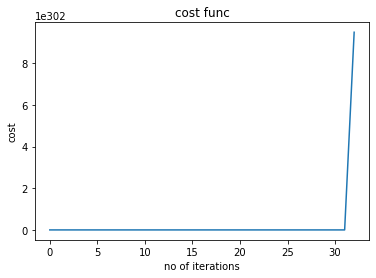

In [8]:
#cost function
plt.title('cost func')
plt.xlabel('no of iterations')
plt.ylabel('cost')
plt.plot(past_costs)
plt.show()